 Theunderlying SC was constructed by (i) drawing 400 random points in the unit square;(ii) generating a triangular lattice via Delauney triangulation; (iii) eliminating edgesinside two predefined regions; and (iv) defining all triangles to be faces.

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random
from scipy.sparse import linalg

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto import plotting

In [5]:
def get_delauney_holes_multi(n_points, centre_holes,radius,points=[]):


    if not len(points):
        x = np.random.rand(n_points)
        y = np.random.rand(n_points)
        points = np.vstack([x,y]).T

    tri = Delaunay(points)

    edge_list = []
    
    
    idx_inside=np.empty([0], dtype=int)
    for i in range(centre_holes.shape[0]):
        idx_inside=np.hstack([idx_inside,encloses([centre_holes[i]],points,radius)[1]])
    
    for t in tri.simplices:
        
        if t[0] not in idx_inside and t[1] not in idx_inside:
            edge_list.append([t[0], t[1]])
     
        if t[1] not in idx_inside and t[2] not in idx_inside:
            edge_list.append([t[1], t[2]])

        if t[0] not in idx_inside and t[2] not in idx_inside:
            edge_list.append([t[0], t[2]])   


            
    graph = nx.Graph()
    #graph.add_nodes_from(np.arange(len(points)))    
    graph.add_edges_from(edge_list)
    
    Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
    g = graph.subgraph(Gcc[0])
    
    
    return g, points



def get_delauney(n_points):
    
    x = np.random.rand(n_points)
    y = np.random.rand(n_points)
    points = np.vstack([x,y]).T

    tri = Delaunay(points)
    edge_list = []
    

    for t in tri.simplices:        
        edge_list.append([t[0], t[1]])     
        edge_list.append([t[1], t[2]])
        edge_list.append([t[0], t[2]])   
        
    graph = nx.Graph()
    #graph.add_nodes_from(np.arange(len(points)))    
    graph.add_edges_from(edge_list)
    
    Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
    g = graph.subgraph(Gcc[0])    
    
    return g, points
    
    
def encloses(centre, points, radius):
    inside_hole = (cdist(centre, points, 'euclidean') <= radius)
    idx_inside = np.where(inside_hole )
    
    return idx_inside




In [6]:
# Plotting the nullspace of L1

def Null_Space_Plot(graph):
    complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)



    L1 = complex_delaunay.L1

    KerL1=sc.linalg.null_space(L1.todense())

    for i in range(KerL1.shape[1]):
        plt.figure()
        nx.draw_networkx_nodes(graph, pos=points, node_size=5)
        nx.draw_networkx_edges(
                graph,
                pos=points,
                edge_color=KerL1[:,i],
                edge_cmap=plt.get_cmap("twilight_shifted"),
                width=5,
                edge_vmin=np.min(KerL1[:,i]),
                edge_vmax=np.max(KerL1[:,i]),
            )
        plt.title('Null space of L1, vector '+str(i))
        plt.show()
        
def extract_spectral_gap(graph):
    # taking the smallest non zero eigenvalue
    
    if type(graph) == nx.Graph:
        complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)
    else:
        complex_delaunay = graph
        

    L1 = complex_delaunay.L1
    
    
    u, s, vh = sc.linalg.svd(L1.todense(), full_matrices=True)
    M, N = u.shape[0], vh.shape[1]

    rcond = np.finfo(s.dtype).eps * max(M, N)
    tol = np.amax(s) * rcond

    num = np.sum(s > tol, dtype=int)
    Q = vh[num:,:].T.conj()

    spectral_gap = s[num-1]
    
    return spectral_gap

We created 680 faces
Spectral gap: 0.017353477576538975


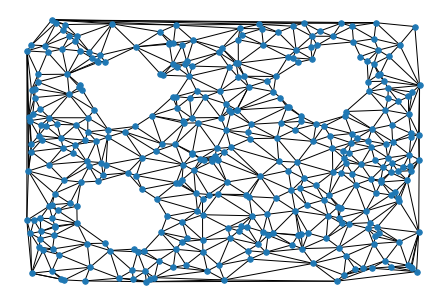

In [4]:
centre_hole_1 = np.array([[0.25,0.25]])
centre_hole_2 = np.array([[0.75,0.75]])
centre_hole_3 = np.array([[0.25,0.75]])

centre_holes=np.concatenate((centre_hole_1,centre_hole_2,centre_hole_3),axis=0)

radius = 0.1

graph, points = get_delauney_holes_multi(400,centre_holes,radius)
pos = dict(enumerate(points))
nx.draw(graph,pos,node_size=30)

print('Spectral gap: {}'.format(extract_spectral_gap(graph)))

We created 706 faces
Spectral gap: 0.01635872984732381


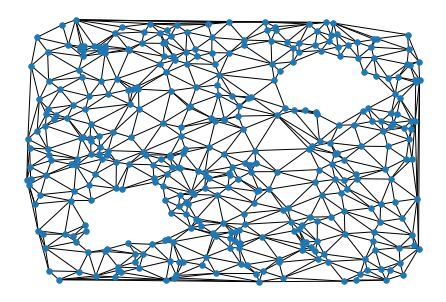

In [5]:
centre_hole_1 = np.array([[0.25,0.25]])
centre_hole_2 = np.array([[0.75,0.75]])

centre_holes=np.concatenate((centre_hole_1,centre_hole_2),axis=0)

radius = 0.1

graph, points = get_delauney_holes_multi(400,centre_holes,radius)
pos = dict(enumerate(points))
nx.draw(graph,pos,node_size=30)

print('Spectral gap: {}'.format(extract_spectral_gap(graph)))

# Single hole size effect

[0.         0.02631579 0.05263158 0.07894737 0.10526316 0.13157895
 0.15789474 0.18421053 0.21052632 0.23684211 0.26315789 0.28947368
 0.31578947 0.34210526 0.36842105 0.39473684 0.42105263 0.44736842
 0.47368421 0.5       ]
We created 780 faces
We created 780 faces
We created 762 faces
We created 754 faces
We created 726 faces
We created 706 faces
We created 689 faces
We created 677 faces
We created 640 faces
We created 600 faces
We created 568 faces
We created 537 faces
We created 508 faces
We created 463 faces
We created 415 faces
We created 369 faces
We created 313 faces
We created 257 faces
We created 200 faces
We created 111 faces


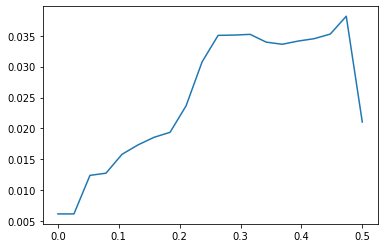

In [6]:
centre_hole = np.array([[0.5,0.5]])

n_points=400
x = np.random.rand(n_points)
y = np.random.rand(n_points)
points = np.vstack([x,y]).T

radii=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]

print(radii)
s_gaps = []
for radius in radii:
    graph, points = get_delauney_holes_multi(n_points,centre_hole, radius, points)

    s_gaps.append(extract_spectral_gap(graph))

    
plt.plot(radii,s_gaps)

In [7]:
centre_hole = np.array([[0.5,0.5]])

n_points=400
x = np.random.rand(n_points)
y = np.random.rand(n_points)
points = np.vstack([x,y]).T

radii=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]

s_gaps = []
order_parameters = []
for radius in radii:
    graph, points = get_delauney_holes_multi(n_points,centre_hole, radius, points)

    s_gaps.append(extract_spectral_gap(graph))
  


    np.random.seed(0)
    initial_phase = np.random.uniform(np.pi/2, 3 * np.pi/2, len(graph.edges))

    t_max = 500
    n_t = 10

    complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)

    edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)
        # plt.savefig("phases_no_faces.png")
    
    
    op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)
    order_parameters.append(op)
    
    

We created 788 faces
We created 788 faces
We created 759 faces
We created 759 faces
We created 717 faces
We created 717 faces
We created 663 faces
We created 663 faces
We created 594 faces
We created 594 faces
We created 515 faces
We created 515 faces
We created 413 faces
We created 413 faces
We created 334 faces
We created 334 faces
We created 206 faces
We created 206 faces


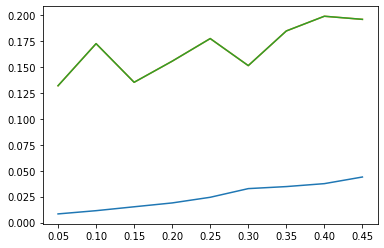

In [8]:
orders = [o[-1] for o in order_parameters]
plt.plot(radii,s_gaps)

plt.plot(radii,orders)

plt.plot(radii,orders)

In [9]:
complex_delaunay.W1

<344x344 sparse matrix of type '<class 'numpy.float64'>'
	with 344 stored elements (1 diagonals) in DIAgonal format>

#  Removing faces but not edges

In [10]:


graph, points = get_delauney(400)
pos = dict(enumerate(points))

print('Spectral gap: {}'.format(extract_spectral_gap(graph)))


all_cliques = nx.enumerate_all_cliques(graph)
faces = [clique for clique in all_cliques if len(clique) == 3]

face_coords = np.array([np.mean(np.vstack([points[node] for node in face]),axis=0).tolist() for face in faces])
face_distance_centre = np.sqrt(((face_coords - 0.5)**2).sum(axis=1))
order_distances = np.argsort(face_distance_centre )[::-1] # reverse order



We created 791 faces
Spectral gap: 0.005288338948160049


In [11]:
s_gaps = []

for i in range(1,len(order_distances)):   
    
    
    faces_idx = order_distances[:-i]
    faces_to_add = [faces[j] for j in faces_idx]
    
    if faces_to_add:
        complex_delaunay = SimplicialComplex(graph=graph, no_faces=False, faces=faces_to_add)
    else: 
        complex_delaunay = SimplicialComplex(graph=graph, no_faces=True)
        
    s_gaps.append(extract_spectral_gap(complex_delaunay))


We created 790 faces
We created 789 faces
We created 788 faces
We created 787 faces
We created 786 faces
We created 785 faces
We created 784 faces
We created 783 faces
We created 782 faces
We created 781 faces
We created 780 faces
We created 779 faces
We created 778 faces
We created 777 faces
We created 776 faces
We created 775 faces
We created 774 faces
We created 773 faces
We created 772 faces
We created 771 faces
We created 770 faces
We created 769 faces
We created 768 faces
We created 767 faces
We created 766 faces
We created 765 faces
We created 764 faces
We created 763 faces
We created 762 faces
We created 761 faces
We created 760 faces
We created 759 faces
We created 758 faces
We created 757 faces
We created 756 faces
We created 755 faces
We created 754 faces
We created 753 faces
We created 752 faces
We created 751 faces
We created 750 faces
We created 749 faces
We created 748 faces
We created 747 faces
We created 746 faces
We created 745 faces
We created 744 faces
We created 74

We created 399 faces
We created 398 faces
We created 397 faces
We created 396 faces
We created 395 faces
We created 394 faces
We created 393 faces
We created 392 faces
We created 391 faces
We created 390 faces
We created 389 faces
We created 388 faces
We created 387 faces
We created 386 faces
We created 385 faces
We created 384 faces
We created 383 faces
We created 382 faces
We created 381 faces
We created 380 faces
We created 379 faces
We created 378 faces
We created 377 faces
We created 376 faces
We created 375 faces
We created 374 faces
We created 373 faces
We created 372 faces
We created 371 faces
We created 370 faces
We created 369 faces
We created 368 faces
We created 367 faces
We created 366 faces
We created 365 faces
We created 364 faces
We created 363 faces
We created 362 faces
We created 361 faces
We created 360 faces
We created 359 faces
We created 358 faces
We created 357 faces
We created 356 faces
We created 355 faces
We created 354 faces
We created 353 faces
We created 35

We created 4 faces
We created 3 faces
We created 2 faces
We created 1 faces


In [56]:
plt.plot(s_gaps[::-1])
plt.xlabel("No. central faces removed")
plt.ylabel("Spectral Gap")

NameError: name 's_gaps' is not defined

# Increasing weight from no-hole to fully filled hole

In [7]:


def get_weighted_delauney(tri,centre_holes,radius,weight_hole):


    # find idx of nodes inside hole
    idx_inside=np.empty([0], dtype=int)
    for i in range(centre_holes.shape[0]):
        idx_inside=np.hstack([idx_inside,encloses([centre_holes[i]],points,radius)[1]])

    # make real edge list
    edge_list = []
    for t in tri.simplices:        
        edge_list.append([t[0], t[1]])     
        edge_list.append([t[1], t[2]])
        edge_list.append([t[0], t[2]])   


    # make edge list of edges to change weight
    edges_to_weight = []
    for t in tri.simplices:        
        if t[0] in idx_inside or t[1] in idx_inside:
            edges_to_weight.append([t[0], t[1]])     
        if t[1] in idx_inside or t[2] in idx_inside:
            edges_to_weight.append([t[1], t[2]])
        if t[0] in idx_inside or t[2] in idx_inside:
            edges_to_weight.append([t[0], t[2]])   


    # create networkx graph
    graph = nx.Graph()
    graph.add_edges_from(edge_list)    
    Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
    g = graph.subgraph(Gcc[0])   


    # add weights
    for u,v in edge_list:
        g[u][v]["weight"]=1

    for u,v in edges_to_weight:
        g[u][v]["weight"]=weight_hole


    # create simplicial complex fully connected
    complex_delaunay = SimplicialComplex(graph=g,  no_faces=False)


    # plot with edge weights
    plt.figure()
    pos = dict(enumerate(points))
    edges,weights = zip(*nx.get_edge_attributes(g,'weight').items())
    nx.draw_networkx_nodes(graph, pos=points, node_size=5)
    nx.draw_networkx_edges(
                graph,
                pos=points,
                edge_color=weights,
                edge_cmap=plt.get_cmap("YlGn"),
                width=2,
                edge_vmin=0,
                edge_vmax=1,
            )

    # define face weights as product of edge weights
    face_weights_matrix = np.ones(complex_delaunay.n_faces)
    for i,face in enumerate(complex_delaunay.faces): 

        e1 = complex_delaunay.graph.edges[face[0],face[1]]['weight']
        e2 = complex_delaunay.graph.edges[face[0],face[2]]['weight']
        e3 = complex_delaunay.graph.edges[face[1],face[2]]['weight']

        face_w = e1*e2*e3

        face_weights_matrix[i] = face_w

    complex_delaunay.face_weights_matrix = sc.sparse.spdiags(
                    face_weights_matrix, 0, complex_delaunay.n_faces, complex_delaunay.n_faces
                )

    return complex_delaunay

We created 795 faces
Spectral gap: 0.006024658914488471


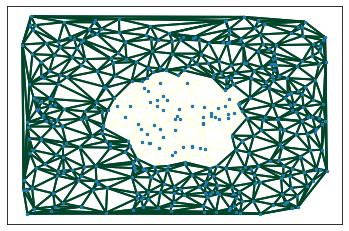

In [8]:
# parameters of delauney
centre_holes = np.array([[0.5,0.5]])
n_points=400
radius = 0.2
hole_weight = 0

x = np.random.rand(n_points)
y = np.random.rand(n_points)
points = np.vstack([x,y]).T
tri = Delaunay(points)

complex_delaunay = get_weighted_delauney(tri,centre_holes,radius,hole_weight)

# this function removes edges and faces with zero weight - otherwise we get infinities 
complex_delaunay.remove_zero_weight_edges_faces()



print('Spectral gap: {}'.format(extract_spectral_gap(complex_delaunay)))

edges,weights = zip(*nx.get_edge_attributes(complex_delaunay.graph,'weight').items())
nx.draw_networkx_nodes(complex_delaunay.graph, pos=points, node_size=5)
nx.draw_networkx_edges(
                complex_delaunay.graph,
                pos=points,
                edge_color=weights,
                edge_cmap=plt.get_cmap("YlGn"),
                width=2,
                edge_vmin=0,
                edge_vmax=1,
            )


We created 795 faces
Spectral gap: 0.00031372409677028084


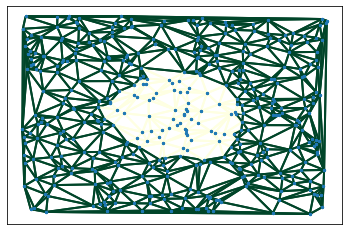

In [24]:
# parameters of delauney
centre_holes = np.array([[0.5,0.5]])
n_points=400
radius = 0.2
hole_weight = 0.01

x = np.random.rand(n_points)
y = np.random.rand(n_points)
points = np.vstack([x,y]).T
tri = Delaunay(points)

complex_delaunay = get_weighted_delauney(tri,centre_holes,radius,hole_weight)

# this function removes edges and faces with zero weight - otherwise we get infinities 
complex_delaunay.remove_zero_weight_edges_faces()



print('Spectral gap: {}'.format(extract_spectral_gap(complex_delaunay)))

edges,weights = zip(*nx.get_edge_attributes(complex_delaunay.graph,'weight').items())
nx.draw_networkx_nodes(complex_delaunay.graph, pos=points, node_size=5)
nx.draw_networkx_edges(
                complex_delaunay.graph,
                pos=points,
                edge_color=weights,
                edge_cmap=plt.get_cmap("YlGn"),
                width=2,
                edge_vmin=0,
                edge_vmax=1,
            )



1184

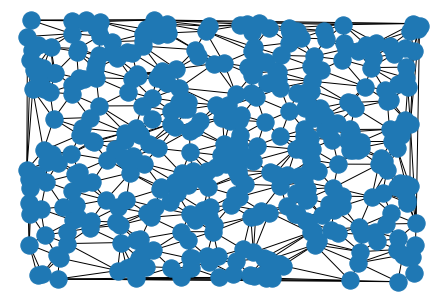

In [25]:
g = complex_delaunay.graph
nx.draw(g,pos = points)
len(g.edges)

1184

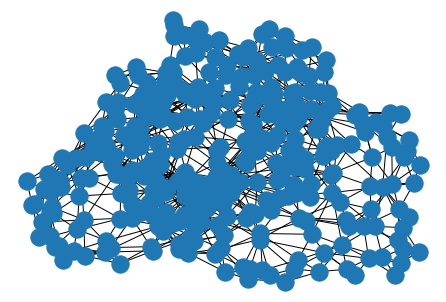

In [26]:
L0 = complex_delaunay.L0.toarray()
np.fill_diagonal(L0,0)
A = abs(L0)
g = nx.Graph(A)
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
g = g.subgraph(Gcc[0])   
nx.draw(g,pos = nx.spring_layout(g))
len(g.edges)

We created 789 faces
Spectral gap: 0.007132044320155177
We created 789 faces
Spectral gap: 3.892218278935737e-05
We created 789 faces
Spectral gap: 0.001861106416089031
We created 789 faces
Spectral gap: 0.004444562522399526
We created 789 faces
Spectral gap: 0.004797847064305226
We created 789 faces
Spectral gap: 0.004938192296844074


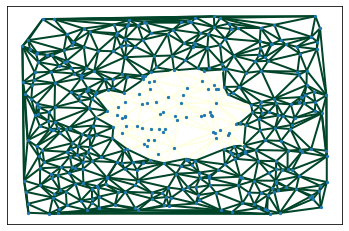

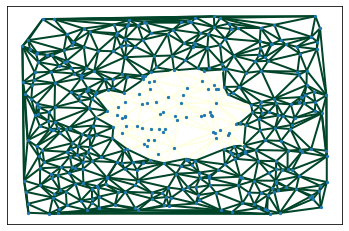

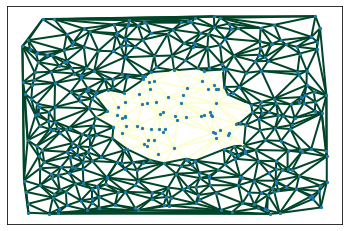

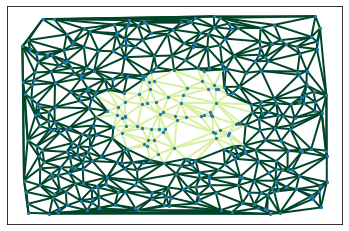

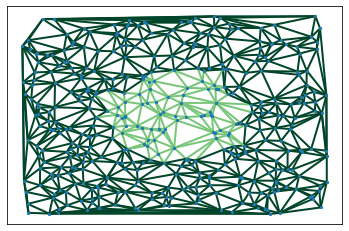

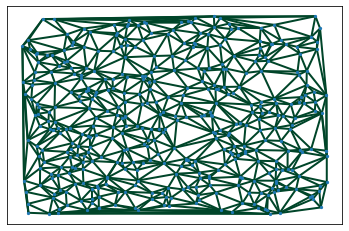

In [27]:

# parameters of delauney
centre_holes = np.array([[0.5,0.5]])
n_points=400
radius = 0.2
hole_weights = [0,0.001,0.05,0.25,0.5,1]#np.logspace(-3,0,20)

x = np.random.rand(n_points)
y = np.random.rand(n_points)
points = np.vstack([x,y]).T
tri = Delaunay(points)


for hole_weight in hole_weights:

    complex_delaunay = get_weighted_delauney(tri,centre_holes,radius,hole_weight)
    complex_delaunay.remove_zero_weight_edges_faces()
    print('Spectral gap: {}'.format(extract_spectral_gap(complex_delaunay)))


We created 185 faces
Spectral gap: 0.0001792196020997899
We created 185 faces
Spectral gap: 0.015095970696208452
We created 185 faces
Spectral gap: 0.024626664116714905
We created 185 faces
Spectral gap: 0.025466787886047386


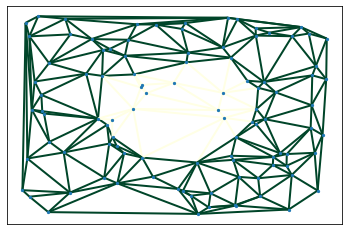

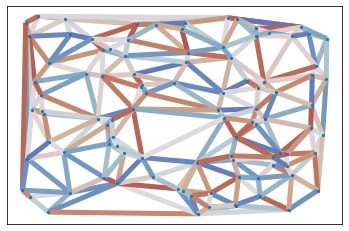

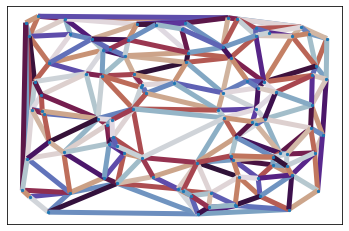

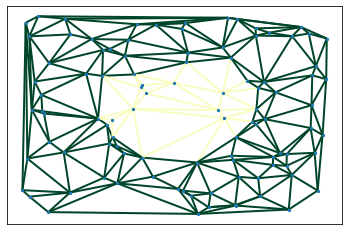

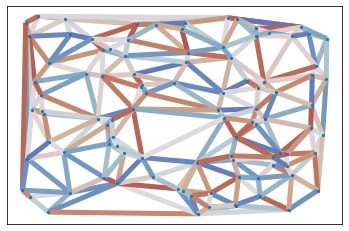

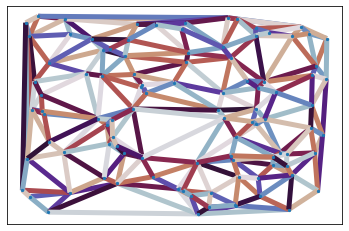

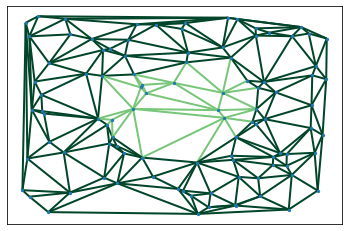

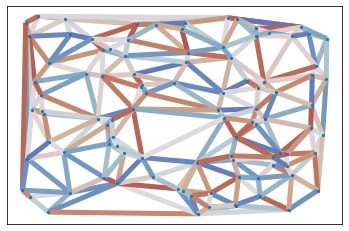

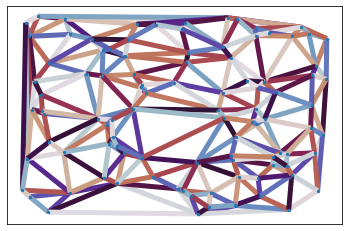

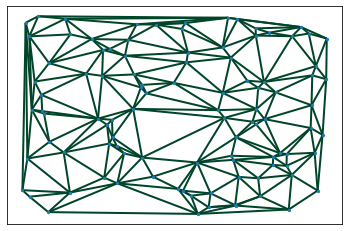

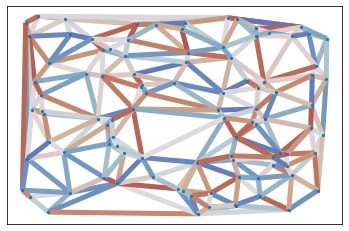

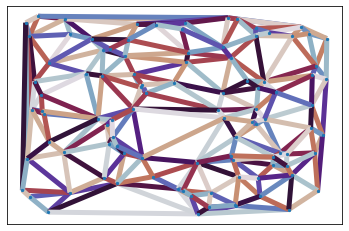

In [130]:
# looping over different edge weights for hole

# parameters of delauney
centre_holes = np.array([[0.5,0.5]])
n_points=100
radius = 0.2
hole_weights = [0.001,0.1,0.5,1]#np.logspace(-3,0,20)

x = np.random.rand(n_points)
y = np.random.rand(n_points)
points = np.vstack([x,y]).T
tri = Delaunay(points)


edge_results = []
for i,hole_weight in enumerate(hole_weights):

    complex_delaunay = get_weighted_delauney(tri,centre_holes,radius,hole_weight)
    complex_delaunay.remove_zero_weight_edges_faces()
    print('Spectral gap: {}'.format(extract_spectral_gap(complex_delaunay)))

    np.random.seed(0)
    initial_phase = np.random.uniform(np.pi/2, 3 * np.pi/2, complex_delaunay.W1.shape[0])
    
    plt.figure()
    nx.draw_networkx_nodes(complex_delaunay.graph, pos=points, node_size=5)
    nx.draw_networkx_edges(
                complex_delaunay.graph,
                pos=points,
                edge_color=initial_phase,
                edge_cmap=plt.get_cmap("twilight_shifted"),
                width=5,
                edge_vmin=0,
                edge_vmax=np.pi*2,
            )  
    
    
    t_max = 500
    n_t = 10
    
    edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)
    
    edge_results.append(edge_result)
       
    
    
    plt.figure()
    nx.draw_networkx_nodes(complex_delaunay.graph, pos=points, node_size=5)
    nx.draw_networkx_edges(
                complex_delaunay.graph,
                pos=points,
                edge_color=edge_results[i].y[:, -1],
                edge_cmap=plt.get_cmap("twilight_shifted"),
                width=5,
                edge_vmin=0,
                edge_vmax=np.pi*2,
            )
    


We created 185 faces
We created 155 faces


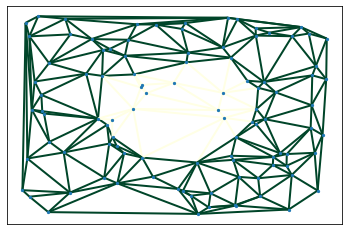

In [131]:
# setting edge weight to zero for hole and taking the phase

complex_delaunay = get_weighted_delauney(tri,centre_holes,radius,0)
idx_edges_removed, idx_faces_removed = complex_delaunay.remove_zero_weight_edges_faces(return_idx=True)
complex_delaunay = SimplicialComplex(graph=complex_delaunay.graph, no_faces=False)


phase_hole = initial_phase[np.where(idx_edges_removed)]

edge_result = integrate_edge_kuramoto(complex_delaunay, phase_hole, t_max, n_t)

edge_results = [edge_result] + edge_results

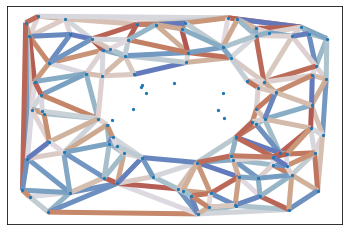

In [132]:
plt.figure()
nx.draw_networkx_nodes(complex_delaunay.graph, pos=points, node_size=5)
nx.draw_networkx_edges(
                complex_delaunay.graph,
                pos=points,
                edge_color=phase_hole,
                edge_cmap=plt.get_cmap("twilight_shifted"),
                width=5,
                edge_vmin=0,
                edge_vmax=np.pi*2,
            )



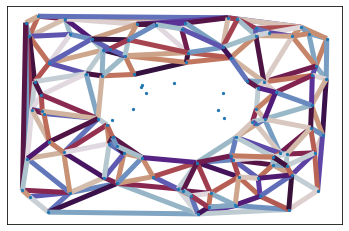

In [133]:

plt.figure()
nx.draw_networkx_nodes(complex_delaunay.graph, pos=points, node_size=5)
nx.draw_networkx_edges(
                complex_delaunay.graph,
                pos=points,
                edge_color=edge_result.y[:, -1],
                edge_cmap=plt.get_cmap("twilight_shifted"),
                width=5,
                edge_vmin=0,
                edge_vmax=np.pi*2,
            )

In [134]:
from sklearn.metrics.pairwise import cosine_similarity

sim = np.zeros([len(edge_results),len(edge_results)])

for i,er_1 in enumerate(edge_results):
    for j,er_2 in enumerate(edge_results):
        
        if er_1.y.shape[0]==idx_edges_removed.shape[0]:
            y1 = er_1.y[np.where(idx_edges_removed),-1].reshape(-1,1).T
        else:
            y1 = er_1.y[:,-1].reshape(-1,1).T

        if er_2.y.shape[0]==idx_edges_removed.shape[0]:
            y2 = er_2.y[np.where(idx_edges_removed),-1].reshape(-1,1).T
        else:
            y2 = er_2.y[:,-1].reshape(-1,1).T
        
        
        sim[i,j]=cosine_similarity(y1,y2)


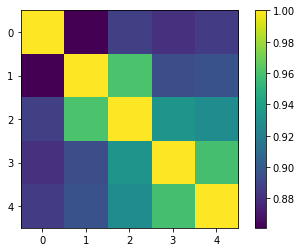

In [74]:
plt.imshow(sim)
plt.colorbar()

# Comparing the 2nd eigenvector

Compare the 2nd eigenvector for a hole with the 2nd eigenvector for a low edge weight 'hole'.



In [135]:
# parameters of delauney
centre_holes = np.array([[0.5,0.5]])
n_points=100
radius = 0.2
hole_weights = [0.001,0.1,0.5,1]#np.logspace(-3,0,20)

x = np.random.rand(n_points)
y = np.random.rand(n_points)
points = np.vstack([x,y]).T
tri = Delaunay(points)

We created 195 faces
We created 165 faces


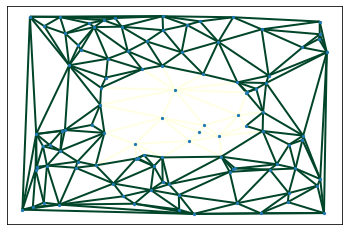

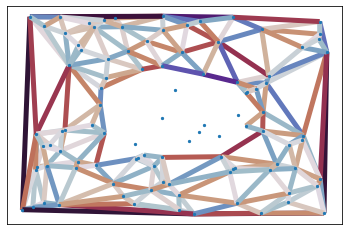

In [151]:
complex_delaunay = get_weighted_delauney(tri,centre_holes,radius,0)
idx_edges_removed, idx_faces_removed = complex_delaunay.remove_zero_weight_edges_faces(return_idx=True)
complex_delaunay = SimplicialComplex(graph=complex_delaunay.graph, no_faces=False)

eigenvals, eigenvecs = linalg.eigsh(L1, 1, which="SM", return_eigenvectors=True)


plt.figure()
nx.draw_networkx_nodes(complex_delaunay.graph, pos=points, node_size=5)
nx.draw_networkx_edges(
                complex_delaunay.graph,
                pos=points,
                edge_color=eigenvecs.reshape(-1),
                edge_cmap=plt.get_cmap("twilight_shifted"),
                width=5,
            )

We created 195 faces
We created 195 faces


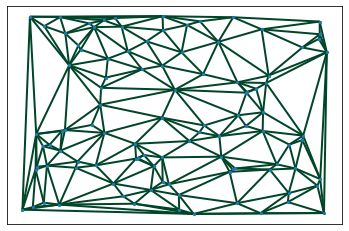

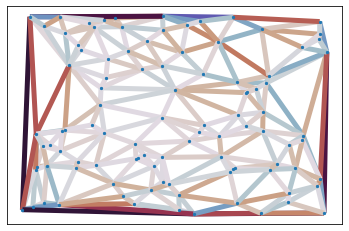

In [156]:
complex_delaunay = get_weighted_delauney(tri,centre_holes,radius,1)
idx_edges_removed, idx_faces_removed = complex_delaunay.remove_zero_weight_edges_faces(return_idx=True)
complex_delaunay = SimplicialComplex(graph=complex_delaunay.graph, no_faces=False)

L1 = complex_delaunay.L1
eigenvals, eigenvecs = linalg.eigsh(L1, 1, which="SM", return_eigenvectors=True)


plt.figure()
nx.draw_networkx_nodes(complex_delaunay.graph, pos=points, node_size=5)
nx.draw_networkx_edges(
                complex_delaunay.graph,
                pos=points,
                edge_color=eigenvecs.reshape(-1),
                edge_cmap=plt.get_cmap("twilight_shifted"),
                width=5,
            )

We created 195 faces
We created 195 faces


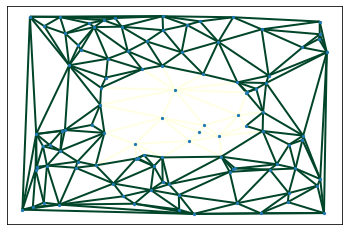

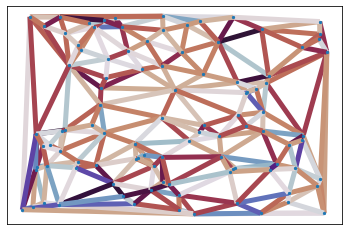

In [157]:
complex_delaunay = get_weighted_delauney(tri,centre_holes,radius,0.001)
idx_edges_removed, idx_faces_removed = complex_delaunay.remove_zero_weight_edges_faces(return_idx=True)
complex_delaunay = SimplicialComplex(graph=complex_delaunay.graph, no_faces=False)

L1 = complex_delaunay.L1
eigenvals, eigenvecs = linalg.eigsh(L1, 1, which="SM", return_eigenvectors=True)


plt.figure()
nx.draw_networkx_nodes(complex_delaunay.graph, pos=points, node_size=5)
nx.draw_networkx_edges(
                complex_delaunay.graph,
                pos=points,
                edge_color=eigenvecs.reshape(-1),
                edge_cmap=plt.get_cmap("twilight_shifted"),
                width=5,
            )